# Transient scenarios

Here we model a local subpopulation of parasites that in steady state has $N_h = 10$, $Q = 5$, $\chi = 0$.  Despite its small size, the local subpopulation maintains a fairly high level of nucleotide diversity $\pi_S \approx 3 \times 10^{-4}$ due to a constant rate of migration $N_m = 1$ from the global metapopulation.  We construct a toy model of the global metapopulation [using the `coalestr.species` function](create-metapopulation.ipynb).

We simulate a step change in transmission parameters that starts 60 generations (15 years) before the present and lasts 20 generations (5 years).  We examine the effects on nucleotide diversity of the subpopulation $\pi_S$, mean within-host nucleotide diversity $\pi_W$, haplotype homozygosity of the subpopulation at a 2cM locus $\gamma_S$, mean within-host haplotype homozygosity at a 2cM locus $\gamma_W$, the fixation index $F_{ST}$ and the inbreeding index $F_{WS}$.

1. In the first scenario, the level of $\chi$ in the subpopulation transiently increases from 0 to 1. The result is a sharp rise in $\pi_W$ and a sharp fall in $\gamma_W$, $F_{ST}$ and $F_{WS}$. There is also a modest rise in $\pi_S$ and a modest fall in $\gamma_S$.

1. In the second scenario, the rate of migration $N_m$ from the metapopulation into the subpopulation transiently increases from 1 to 5. This causes a sharp rise in $\pi_W$, a more modest rise in $\pi_S$ and a sharp fall in $\gamma_W$, $\gamma_S$, $F_{ST}$ and $F_{WS}$. Thus the effects of an increase in $N_m$ are rather similar to those of an increase in $\chi$.

1. In the third scenario, the level of $N_h$ in the subpopulation transiently increases from 10 to 30.  The result is a sharp rise in $F_{WS}$, a modest rise in $F_{ST}$ and $\gamma_W$, a modest fall in $\pi_W$, and small reduction in $\pi_S$. These results appear paradoxical because we might expect an increase in $N_h$ to cause $\pi_S$ to rise whereas it falls slightly. The paradox can be explained by recalling that $N_m = mN_h$. Although $N_m$ is constant, the rise in $N_h$ causes $m$ to decline, and this reduction in the proportion of hosts that have migrated from the metapopulation counterbalances the local increase in effective number of hosts, causing $\pi_S$ to remain almost unchanged.

We also look at more complex scenarios involving step changes in a combination of transmission parameters. 

In [1]:
!pip install coalestr
from coalestr import cs

In [2]:
metapop = cs.species()
metapop.get_coalescent()
metapop.get_diversity()

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0     17961.7   6421.2
Observation time.  Nucleotide diversity     Haplotype homozygosity
                      beho       wiho           beho       wiho
        0           3.95e-04   1.41e-04       3.23e-03   5.92e-01


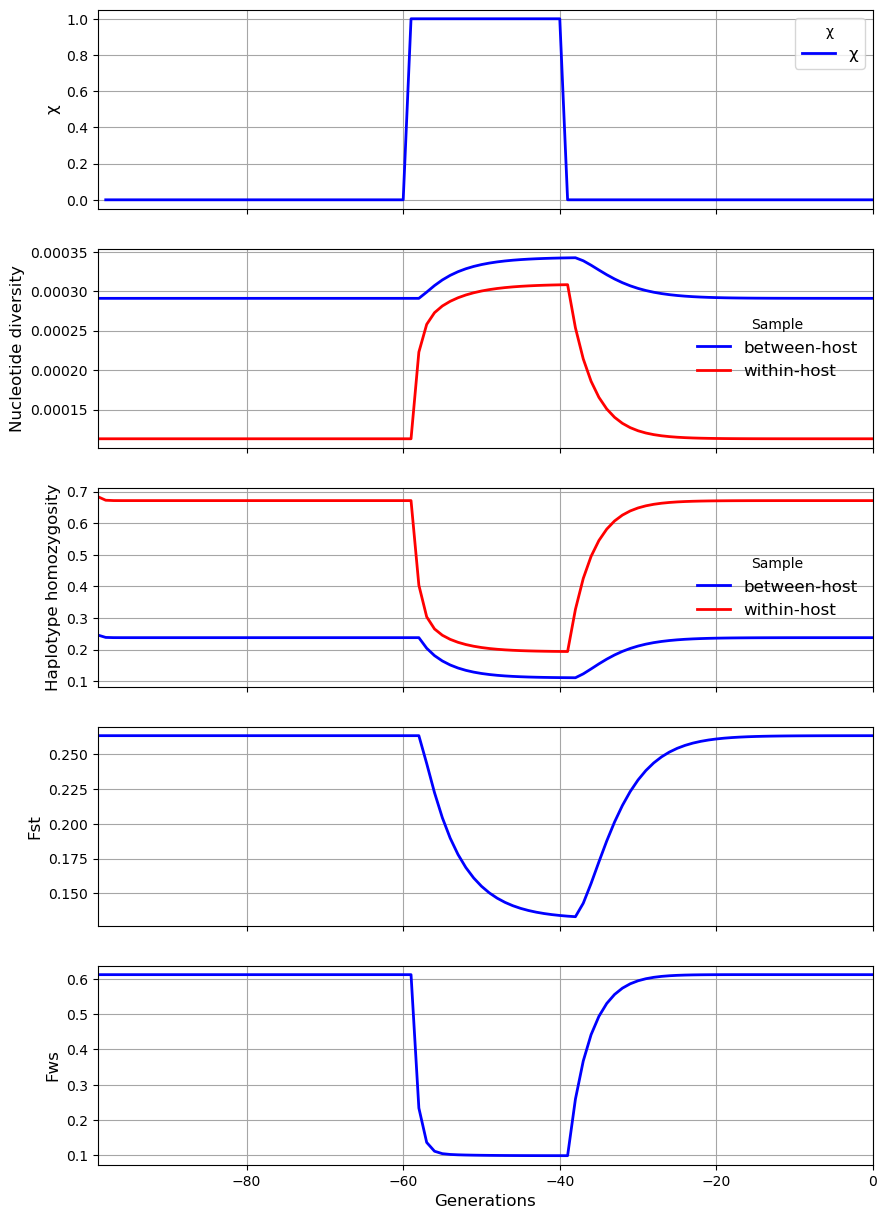

In [3]:
''' 
Steady state: N=10, Q=5, X=0, M=1
Transient scenario: X=1 for 20 generations
'''

subpop_history = [[300, 10, 5, 0, 1],
                  [20, 10, 5, 1, 1],
                  [40, 10, 5, 0, 1]]

observations = range(100)

subpop = cs.Population(subpop_history, metapopulation = metapop)
subpop.get_coalescent(observations, show = False)
subpop.get_diversity(show = False)
subpop.plot_observations(metrics = ("X", "snp_het", "hap_hom", "Fst", "Fws"))

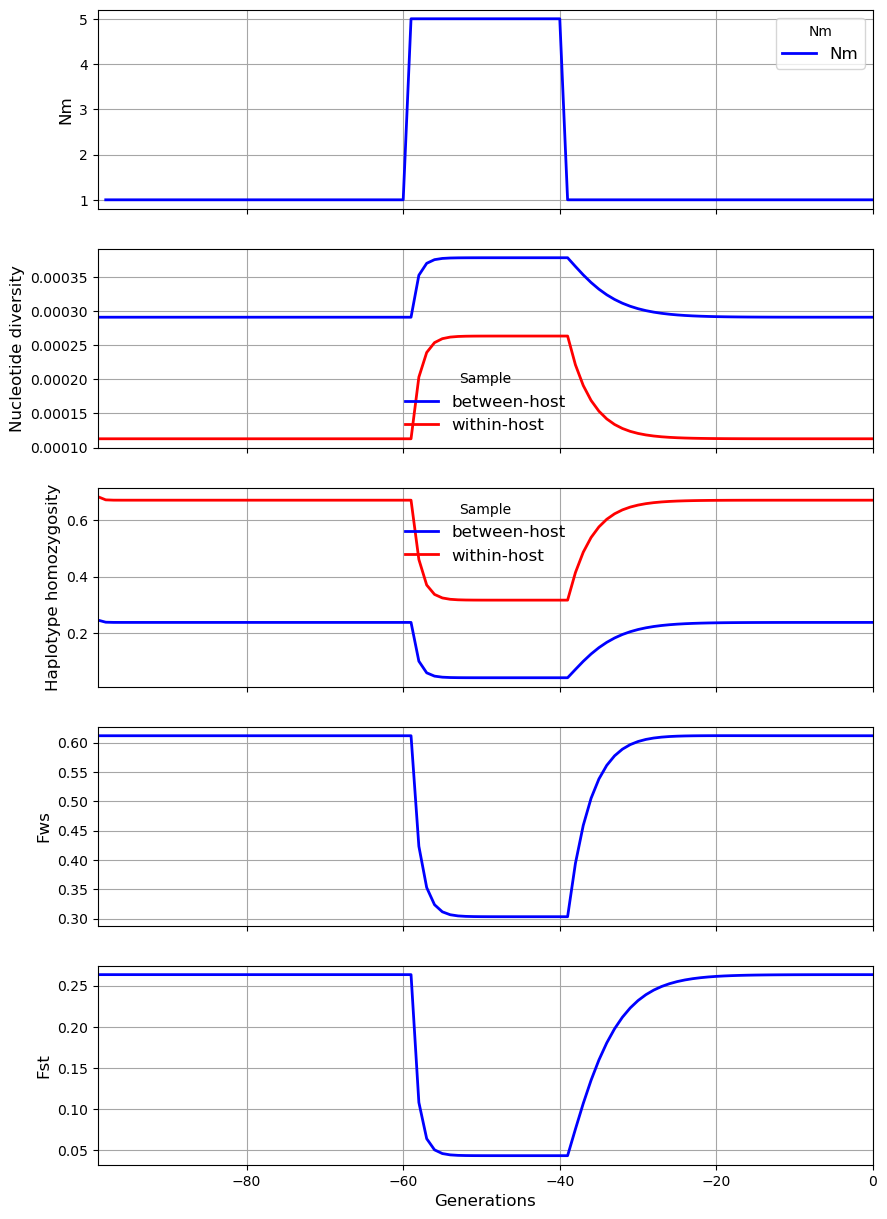

In [6]:
''' 
Steady state: N=10, Q=5, X=0, M=1
Transient scenario: M=5 for 20 generations
'''

subpop_history = [[300, 10, 5, 0, 1],
                  [20, 10, 5, 0, 5],
                  [40, 10, 5, 0, 1]]

observations = range(100)

subpop = cs.Population(subpop_history, metapopulation = metapop)
subpop.get_coalescent(observations, show = False)
subpop.get_diversity(show = False)
subpop.plot_observations(metrics = ("M", "snp_het", "hap_hom", "Fws", "Fst"))

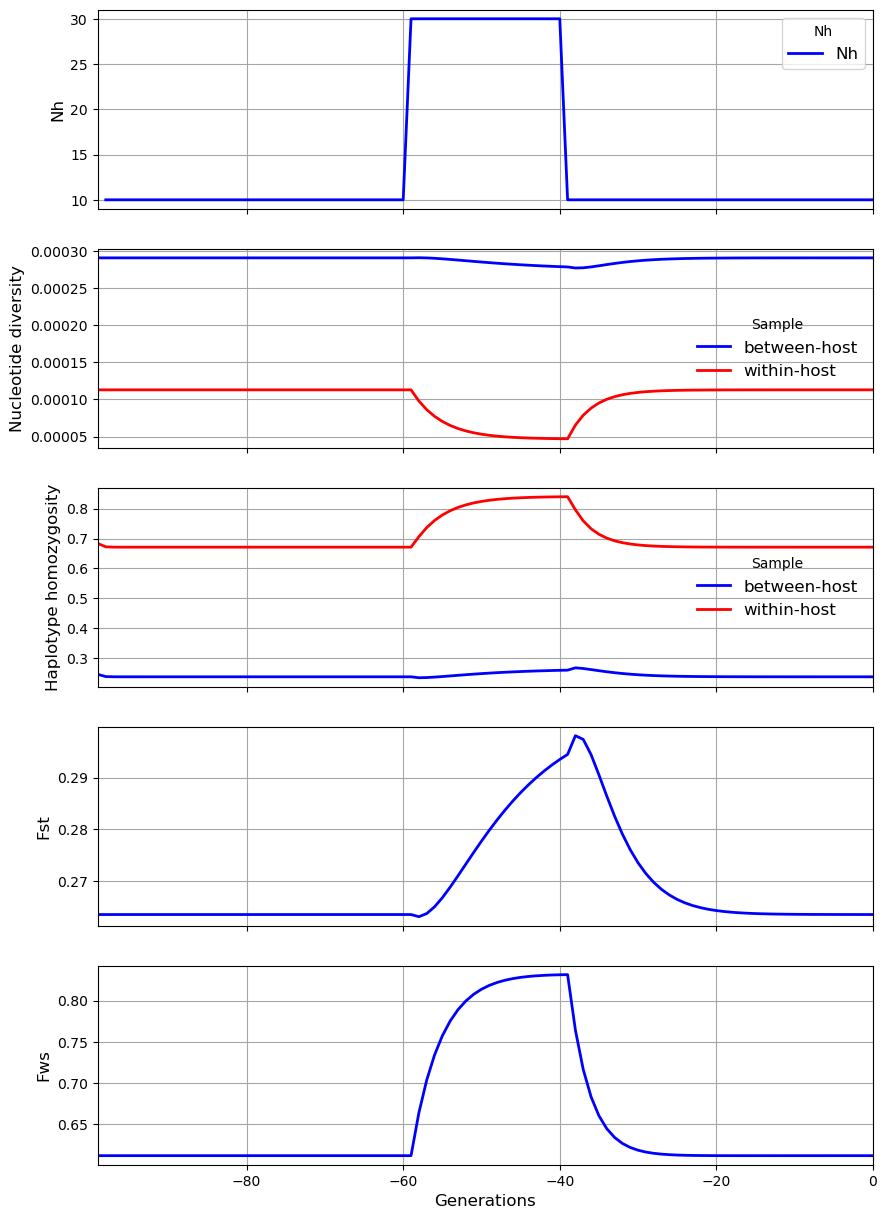

In [5]:
''' 
Steady state: N=10, Q=5, X=0, M=1
Transient scenario: N=30 for 20 generations
'''

subpop_history = [[300, 10, 5, 0, 1],
                  [20, 30, 5, 0, 1],
                  [40, 10, 5, 0, 1]]

observations = range(100)

subpop = cs.Population(subpop_history, metapopulation = metapop)
subpop.get_coalescent(observations, show = False)
subpop.get_diversity(show = False)
subpop.plot_observations(metrics = ("N", "snp_het", "hap_hom", "Fst", "Fws"))

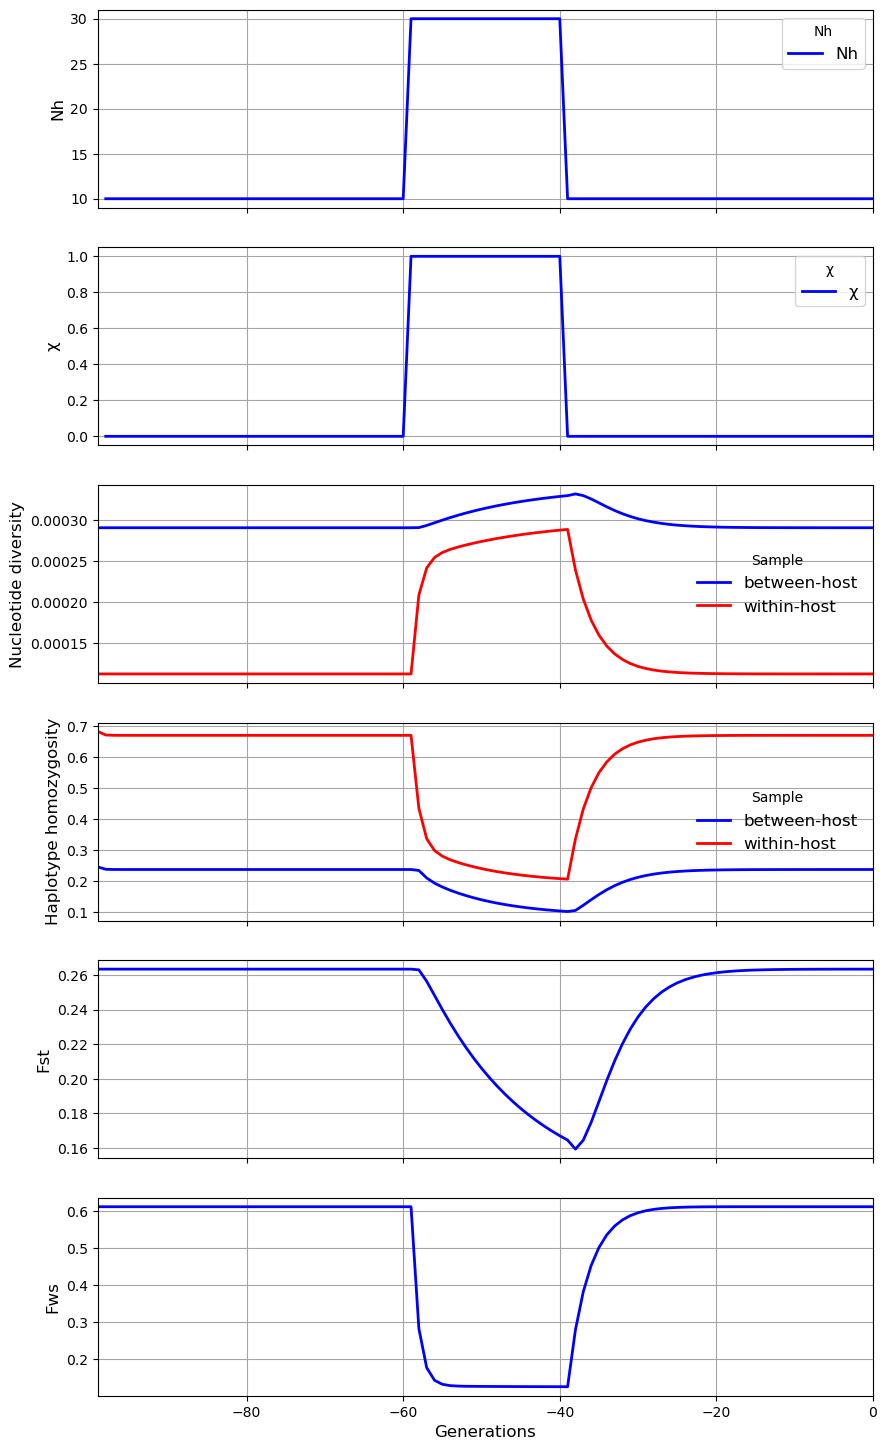

In [8]:
''' 
Steady state: N=10, Q=5, X=0, M=1
Transient scenario: N=30, X=1 for 20 generations
'''

subpop_history = [[300, 10, 5, 0, 1],
                  [20, 30, 5, 1, 1],
                  [40, 10, 5, 0, 1]]

observations = range(100)

subpop = cs.Population(subpop_history, metapopulation = metapop)
subpop.get_coalescent(observations, show = False)
subpop.get_diversity(show = False)
subpop.plot_observations(metrics = ("N", "X", "snp_het", "hap_hom", "Fst", "Fws"))

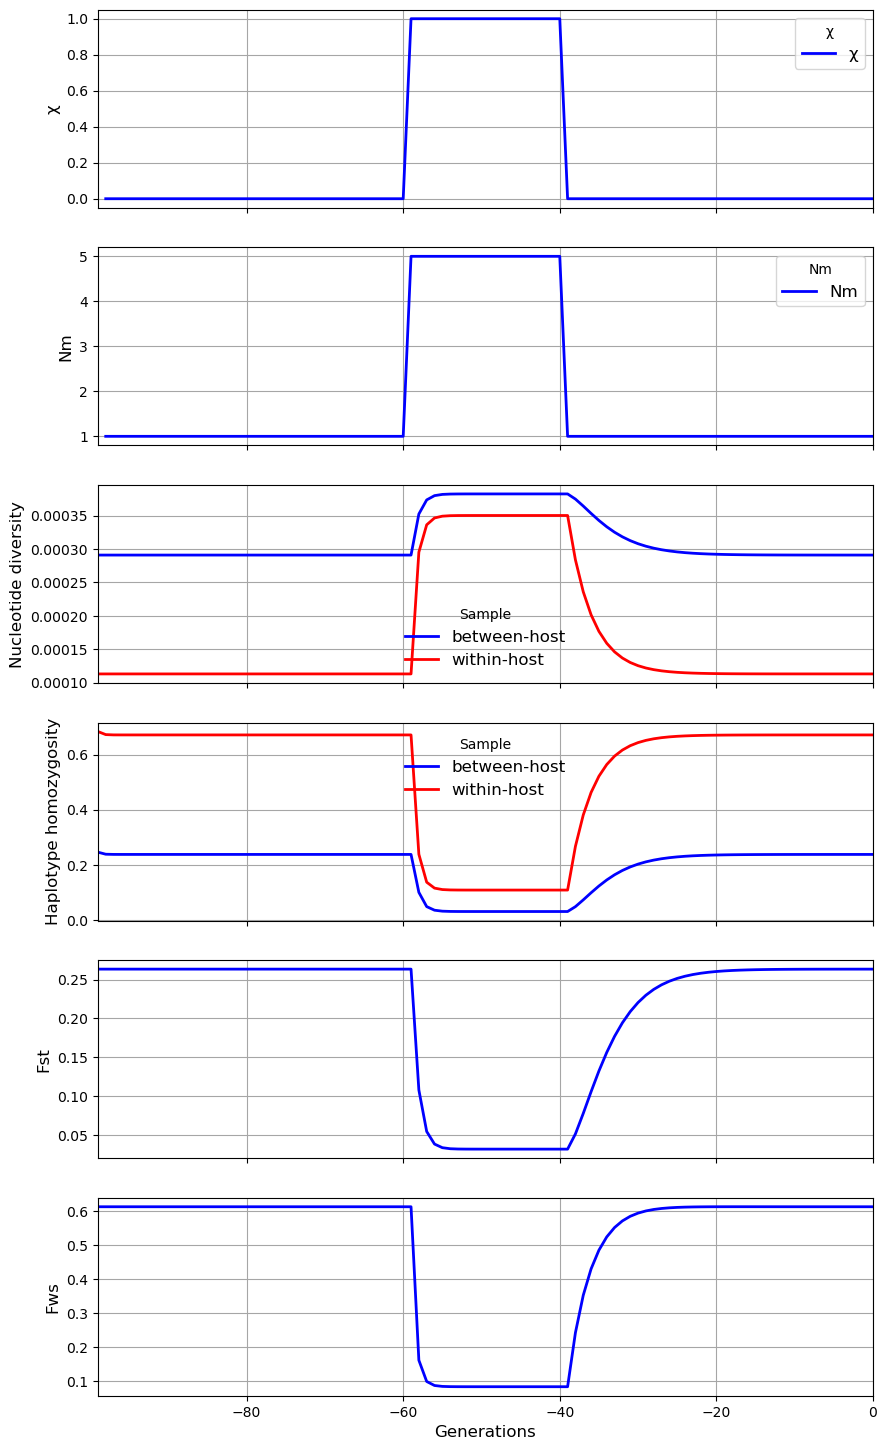

In [9]:
''' 
Steady state: N=10, Q=5, X=0, M=1
Transient increase of X=1, M=5 for 20 generations
'''

subpop_history = [[300, 10, 5, 0, 1],
                  [20, 10, 5, 1, 5],
                  [40, 10, 5, 0, 1]]

observations = range(100)

subpop = cs.Population(subpop_history, metapopulation = metapop)
subpop.get_coalescent(observations, show = False)
subpop.get_diversity(show = False)
subpop.plot_observations(metrics = ("X", "M", "snp_het", "hap_hom", "Fst", "Fws"))

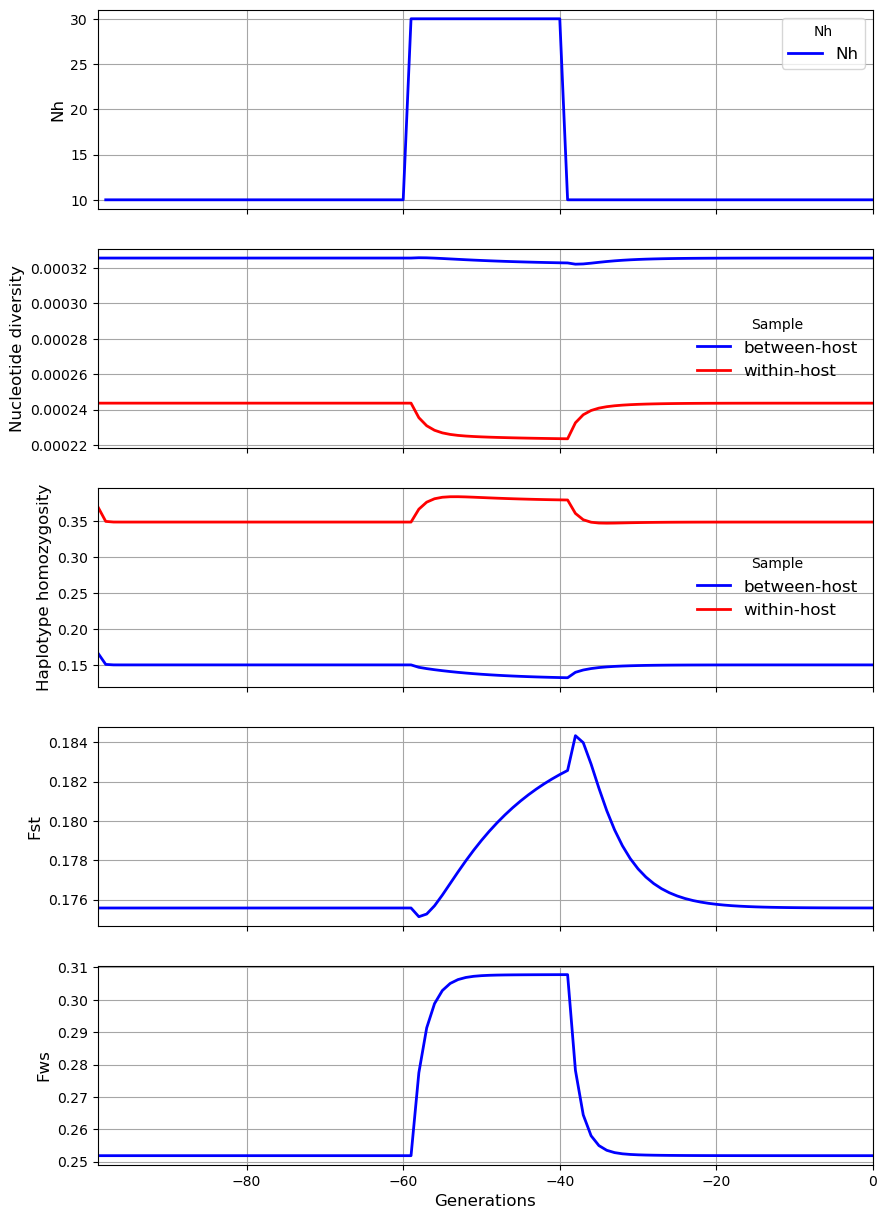

In [11]:
''' 
Steady state: N=10, Q=5, X=0.5, M=1
Transient increase of N=30 for 20 generations
'''

subpop_history = [[300, 10, 5, 0.5, 1],
                  [20, 30, 5, 0.5, 1],
                  [40, 10, 5, 0.5, 1]]

observations = range(100)

subpop = cs.Population(subpop_history, metapopulation = metapop)
subpop.get_coalescent(observations, show = False)
subpop.get_diversity(show = False)
subpop.plot_observations(metrics = ("N", "snp_het", "hap_hom", "Fst", "Fws"))